In [2]:
import pandas as pd 
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling1D, BatchNormalization
from keras.layers import Conv1D , Lambda
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

x_train = np.load('X_del_A.npy')
y_train = np.load('Y_del_A.npy')

#x_train = np.load('C:/Users/Geksli/Documents/юрга/X.npy')
#y_train = np.load('C:/Users/Geksli/Documents/юрга/Y.npy')



bb = 40
act = "relu"

model = Sequential() 
model.add(BatchNormalization(input_shape=(60, bb)))
#model.add(Conv1D(256, (1,), activation='relu', kernel_initializer = "normal"))
#model.add(Dropout(0.4)) 
model.add(Conv1D(32, (1,), activation='relu', kernel_initializer = "normal"))
model.add(Dropout(0.4))
model.add(Conv1D(16, (1,), activation='relu', kernel_initializer = "normal"))
model.add(Dropout(0.4)) 
model.add(Conv1D(8, (1,), activation='relu', kernel_initializer = "normal")) 
model.add(Conv1D(1, (1,), activation='relu', kernel_initializer = "normal")) 
model.add(Flatten()) 
model.add(Dense(1, activation = "linear", kernel_initializer = 'Ones', trainable = False))
##model.add(keras.layers.Lambda(lambda x: keras.backend.sum(x, axis=1)))
##model.add(keras.layers.Lambda(lambda x: keras.backend.sum(x, axis=1), output_shape=(1,)))

model.summary()

model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_absolute_error'])

history = model.fit(x_train[:, :, :bb], y_train, 
                    batch_size = 64, epochs = 100, validation_split=0.3)



Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 60, 40)            160       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 32)            1312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 60, 16)            528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)    

78.98118238978661

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


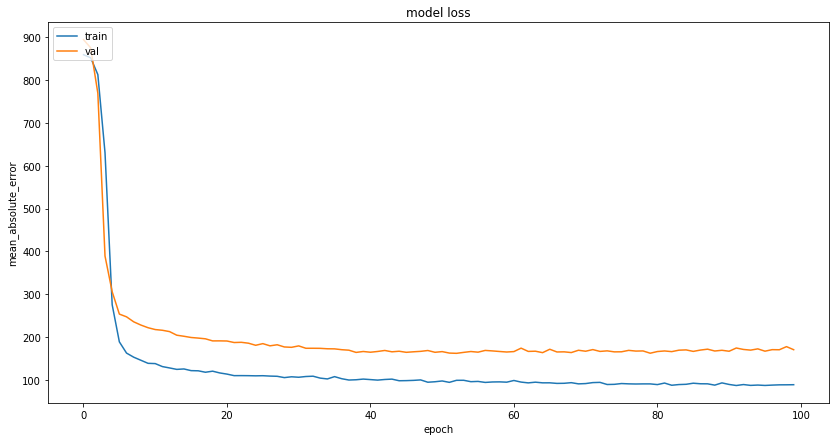

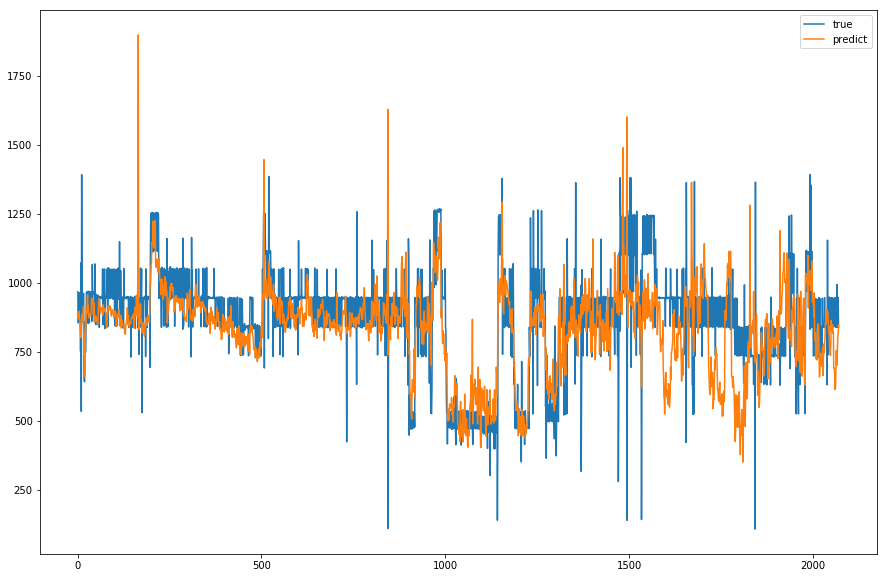

In [3]:

preds=model.predict(x_train[:, :, :bb])

r2_score(y_train, preds)
mean_absolute_error(y_train, preds)

print(history.history.keys())
plt.figure(figsize=(14,7))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model loss')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


d = {'true': y_train, 'predict': preds[:, 0]}
dp = pd.DataFrame(data = d)

dp.plot(figsize=(15,10))


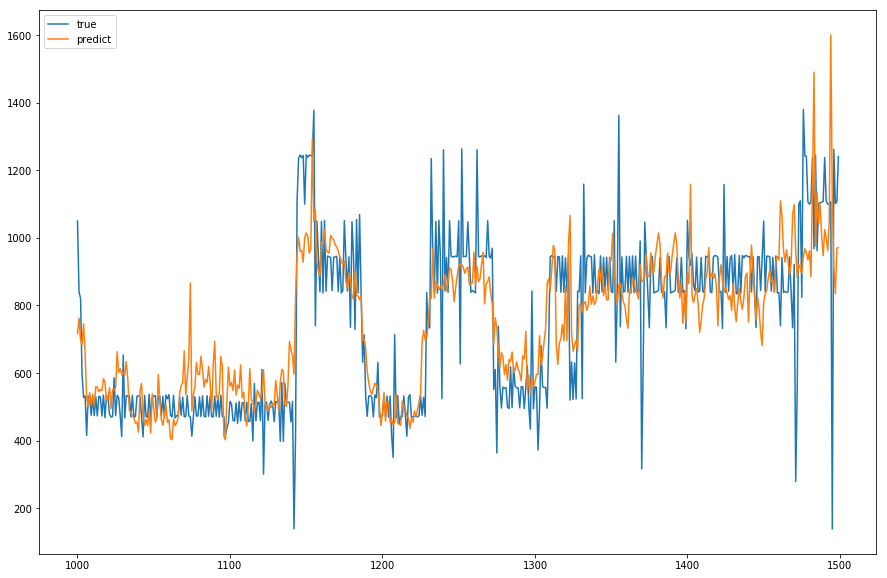

In [17]:
dp[1000:1500].plot(figsize=(15,10))

In [4]:
dp

,true,predict
0,967.0,888.648071
1,962.0,878.238525
2,854.0,868.877441
3,962.0,870.544800
4,964.0,895.381470
5,961.0,876.453857
6,860.0,863.467407
7,961.0,833.345825
8,751.0,805.766541
9,1071.5,800.638123
